In [370]:
import numpy as np

# analytical version of linear regression
def alr(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

# numerical version of linear regression
def nlr(thetha, X, y):
    a = y - np.dot(X, thetha)
    b = y - np.dot(X, thetha)
    return (1/len(X)) * np.dot(a, b)


In [371]:
# prepare dataset
from sklearn.datasets import make_regression
from scipy.optimize import minimize

input_samples, output_values = make_regression(n_samples=1023, n_features=1, noise=42)

X = np.ones((len(input_samples), 2))
X[:, 1] = input_samples.T

In [372]:
# find thetha vector using both version of linear regression
analytical_result = alr(X, output_values)
numerical_result = minimize(nlr, [1, 1], args=(X, output_values), method='Powell').x

print(analytical_result)
print(numerical_result)

[ 0.60333577 69.78949941]
[ 0.60333577 69.78949976]


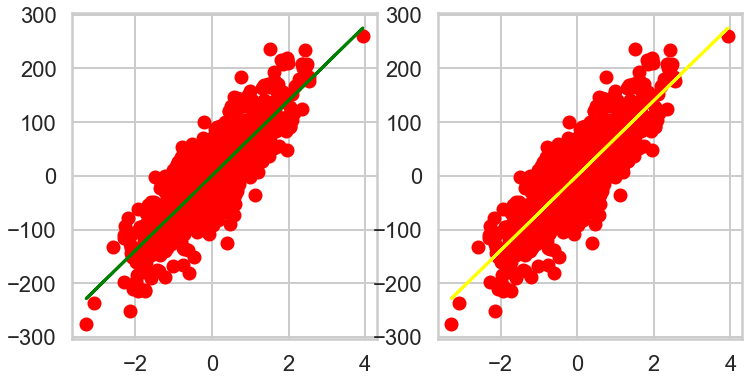

In [373]:
# construct plot for both results, which are pretty identical
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(context='poster', style='whitegrid')

fig, axs = plt.subplots(1, 2 ,figsize=(12, 6))
axs[0].plot(input_samples, input_samples * analytical_result[1] + analytical_result[0], color='green')
axs[1].plot(input_samples, input_samples * numerical_result[1] + numerical_result[0], color='yellow')
axs[0].scatter(input_samples, output_values, color='red')
axs[1].scatter(input_samples, output_values, color='red')

plt.show()

In [374]:
import time
import tracemalloc
# measure time and memory
times = []
memories = []

tracemalloc.start()

before = time.time()
tracemalloc.clear_traces()
membefore = tracemalloc.take_snapshot()
for i in range(0, 1000):
    alr(X, output_values)
after = time.time()
memafter = tracemalloc.take_snapshot()
times.append(after - before)
top_stats = memafter.compare_to(membefore, 'lineno')
for stat in top_stats[:1]:
    memories.append(stat.size_diff)

before = time.time()
tracemalloc.clear_traces()
membefore = tracemalloc.take_snapshot()
for i in range(0, 1000):
    minimize(nlr, [1, 1], args=(X, output_values), method='Powell')
after = time.time()
memafter = tracemalloc.take_snapshot()
times.append(after - before)
for stat in top_stats[:1]:
    memories.append(stat.size_diff)

[0.11406588554382324, 12.839163064956665]


Text(0.5, 0, 'memory')

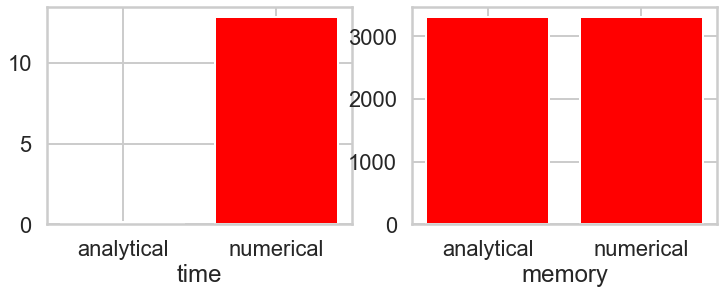

In [375]:
# plot results (i'm not sure how does the emmory module work, cause obv here it doesn't seem to be working)
fig, axs = plt.subplots(1, 2 ,figsize=(12, 4))

print(times)

axs[0].bar(['analytical', 'numerical'], times, color='red')
axs[0].set_xlabel('time')
axs[1].bar(['analytical', 'numerical'], memories, color='red')
axs[1].set_xlabel('memory')